# Лекция №2

Так что такое гистограмма? Вы можете рассматривать гистограмму как график или график, который дает вам общее представление о распределении интенсивности изображения. Это график со значениями пикселей (от 0 до 255, не всегда) по оси X и соответствующим количеством пикселей в изображении по оси Y.

Это просто еще один способ понять образ. Глядя на гистограмму изображения, вы получаете представление о контрасте, яркости, распределении интенсивности и т. Д. Этого изображения. Почти все инструменты обработки изображений сегодня предоставляют функции на гистограмме. Ниже приведено изображение с веб-сайта Cambridge in Color, и я рекомендую вам посетить этот сайт для получения более подробной информации.

<img src="img/histogram_sample.jpg" alt="Drawing" style="width: 400px;"/>

Вы можете увидеть изображение и его гистограмму. (Помните, эта гистограмма нарисована для изображения в оттенках серого, а не для цветного изображения). Левая область гистограммы показывает количество более темных пикселей на изображении, а правая область показывает количество более ярких пикселей. На гистограмме видно, что темная область больше, чем яркая, а количество полутонов (значения пикселей в среднем диапазоне, скажем, около 127) очень меньше.

#### Найдем гистограмму

https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/histogram_calculation/histogram_calculation.html#histogram-calculation

Теперь у нас есть представление о том, что такое гистограмма, мы можем посмотреть, как это найти. И OpenCV, и Numpy поставляются со встроенной функцией для этого. Прежде чем использовать эти функции, нам нужно понять некоторые термины, связанные с гистограммами.

БИНЫ: вышеупомянутая гистограмма показывает количество пикселей для каждого значения пикселя, то есть от 0 до 255. т.е. вам нужно 256 значений, чтобы показать вышеупомянутую гистограмму. Но учтите, что если вам не нужно находить количество пикселей для всех значений пикселей по отдельности, а количество пикселей в интервале значений пикселей? скажем, например, вам нужно найти количество пикселей, лежащих в диапазоне от 0 до 15, а затем от 16 до 31, ..., от 240 до 255. Для представления гистограммы вам понадобится всего 16 значений. И это то, что показано в примере, приведенном в руководствах OpenCV по гистограммам.

Таким образом, вы просто делите всю гистограмму на 16 частей, а значение каждой части - это сумма всех пикселей в ней. Эта каждая часть называется "BIN". В первом случае число бинов равно 256 (по одному на каждый пиксель), а во втором - только 16. BINS представлен термином histSize в документах OpenCV.

DIMS: Количество параметров, для которых мы собираем данные. В этом случае мы собираем данные только об одном значении - значении интенсивности. Так что здесь это 1.

RANGE: Это диапазон значений интенсивности, которые вы хотите измерить. Обычно это [0,256], то есть все значения интенсивности.

1. Расчет гистограммы в OpenCV
Так что теперь мы используем функцию cv2.calcHist (), чтобы найти гистограмму. Давайте ознакомимся с функцией и ее параметрами:

cv2.calcHist (изображения, каналы, маска, histSize, диапазоны [, Hist [, накапливать]])
images: это исходное изображение типа uint8 или float32. его следует указывать в квадратных скобках, т. е. «[img]».
каналы: также указывается в квадратных скобках. Это индекс канала, для которого мы рассчитываем гистограмму. Например, если входное изображение представляет собой изображение в градациях серого, его значение равно [0]. Для цветного изображения вы можете передать [0], [1] или [2], чтобы вычислить гистограмму синего, зеленого или красного канала соответственно.
маска: маска изображения. Чтобы найти гистограмму полного изображения, она задается как «Нет». Но если вы хотите найти гистограмму определенной области изображения, вы должны создать для нее изображение маски и указать ее как маску. (Я покажу пример позже.)
histSize: это представляет наш счетчик БИН. Нужно указывать в квадратных скобках. Для полной шкалы мы передаем [256].
Диапазоны: это наш ДИАПАЗОН. Обычно это [0,256].
Итак, начнем с примера изображения. Просто загрузите изображение в режиме оттенков серого и найдите его полную гистограмму.

примеры для обработки

https://prophotos.ru/lessons/17582-chto-takoe-gistogramma-uchimsya-chitat-gistogrammu-izobrazheniya

In [3]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline

## Гистограммы 

1. Понятие гистограммы
2. Выравнивание гистограммы
3. Гамма коррекция яркости и освещенности

In [1]:
img = cv2.imread('img\\lk.jpg')
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

NameError: name 'cv2' is not defined

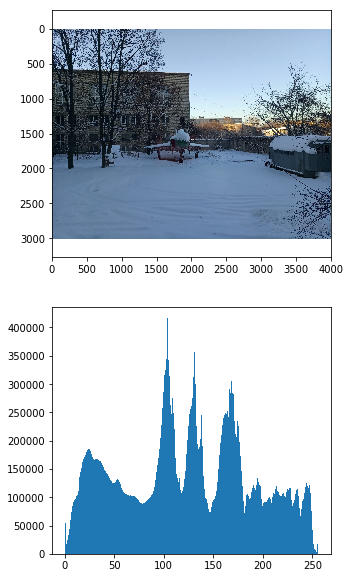

In [22]:
fig, m_axs = plt.subplots(2, 1, figsize=(5, 10))
m_axs[0].axis('equal')
m_axs[0].imshow(img)
m_axs[1].hist(img.ravel(), 256, [0,256]);

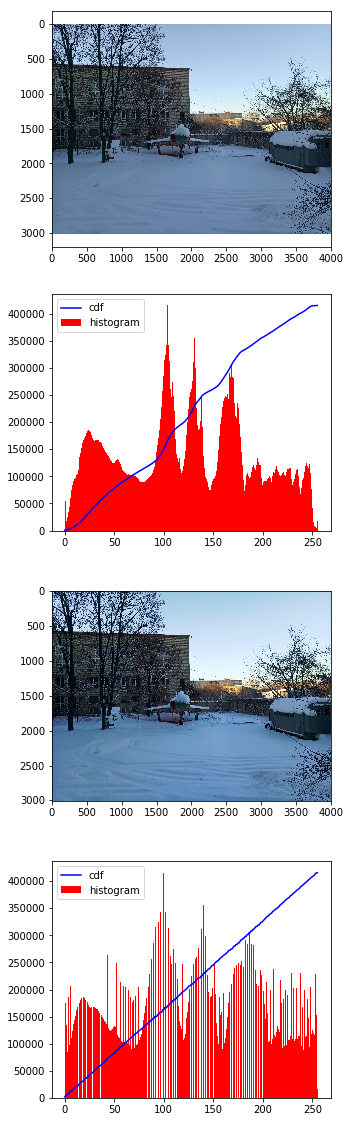

In [23]:
#img = cv2.medianBlur(img, 5)

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')



img2 = cdf[img]

hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])
cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * hist2.max()/ cdf2.max()


fig, m_axs = plt.subplots(4, 1, figsize=(5, 20))
m_axs[0].axis('equal')
m_axs[0].imshow(img)
m_axs[1].plot(cdf_normalized, color = 'b')
m_axs[1].hist(img.flatten(),256,[0,256], color = 'r')
m_axs[1].legend(('cdf','histogram'), loc = 'upper left')

m_axs[2].imshow(img2)
m_axs[3].plot(cdf_normalized2, color = 'b')
m_axs[3].hist(img2.flatten(),256,[0,256], color = 'r')
m_axs[3].legend(('cdf','histogram'), loc = 'upper left');

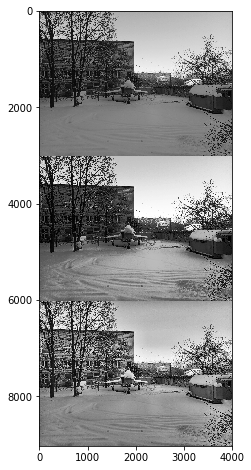

In [24]:
gray = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)
equ = cv2.equalizeHist(gray)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(gray)

res = np.vstack((gray,equ, cl1)) #stacking images side-by-side
plt.figure(figsize=(12,8))
plt.imshow(res)

In [ ]:
img = cv2.imread('img\\lk.jpg')
## для отрисовки в pyplot
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)

img = np.int8(img2)  

contrast   = 0
brightness = 10

img = img*(contrast/127 + 1) - contrast + brightness

# we now have an image that has been adjusted for brightness and
# contrast, but we need to clip values not in the range 0 to 255
img = np.clip(img, 0, 255)  # force all values to be between 0 and 255

# finally, convert image back to unsigned 8 bit integer
img = np.uint16(img)

cv2.imshow('Increased contrast', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('img\\lk.jpg')
cv2.imshow("Original image",img)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2., tileGridSize=(8,8))

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels

l2 = clahe.apply(l)  # apply CLAHE to the L-channel

lab = cv2.merge((l2,a,b))  # merge channels
img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
cv2.imshow('Increased contrast', img2)
#cv2.imwrite('sunset_modified.jpg', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[200:500, 300:700] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full, color='r'), plt.plot(hist_mask, color='g')
plt.xlim([0,256])

## Фильтры

План:
1. Понятие свертки
2. Воздействие свертки на матрицу
3. Типы сверток и их приминение

#### Поиграемся с фильтрами

# !!1  каждый фильтр описать из документации с соответсвующим примером 
 

Показать суть фильтров - преобразования для последующего использования в главных задач CV: классификация и сегментация

In [12]:
img = cv2.imread('img\\lk.jpg')
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

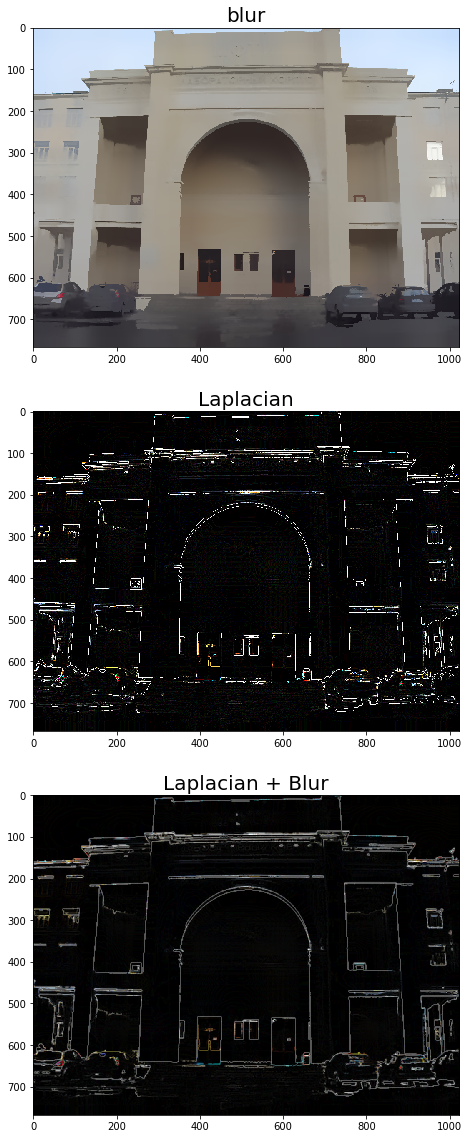

In [15]:
# Теперь пощупаем несколько филттров и их комбинации 
    
## Лапласиан 
kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=np.float32)/0.1

## переведем изображение в оттенки серого - цвет нам тут не нужен
gray = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)


## Попробуем несколько типов блюра 
blur = cv2.blur(gray, (3,3))                       ## осреднение значений в ядре 
gaus_blur = cv2.GaussianBlur(gray, (5,5), 0)       ## гауссов блюр 
median_blur = cv2.medianBlur(gray, 5)              ## медиана всех значений в ядре 
bil_blur = cv2.bilateralFilter(gray, 9, 75, 75)    ## двусторонниый фильтр 
pyr_d = cv2.pyrDown(gray)                          ## blur & downsampling
pyr_u = cv2.pyrUp(gray)                            ## blur & upsampling 
pyr_mean = cv2.pyrMeanShiftFiltering(img, 25, 40)  ## выделяет области по цвету (аналог knn в машинке)

#gray_pyr_mean = cv2.cvtColor(pyr_mean, cv2.COLOR_RGB2GRAY)

## Применяем фильтры 
dst = cv2.filter2D(pyr_mean, -1, kernel)           ## находим границы лапласианом
#dst_blur = cv2.GaussianBlur(dst, (5,5),0)
dst_blur = cv2.blur(dst, (3,3))                    ## еще раз блюрим для гладких границ 

## Визуализация
fig, m_axs = plt.subplots(3, 1, figsize=(24, 20))
ax1, ax2, ax3 = m_axs

plt.gray()
ax1.set_title('blur', fontsize=20)
ax1.imshow(pyr_mean)
ax2.set_title('Laplacian', fontsize=20)
ax2.imshow(dst)
ax3.set_title('Laplacian + Blur', fontsize=20)
ax3.imshow(dst_blur);

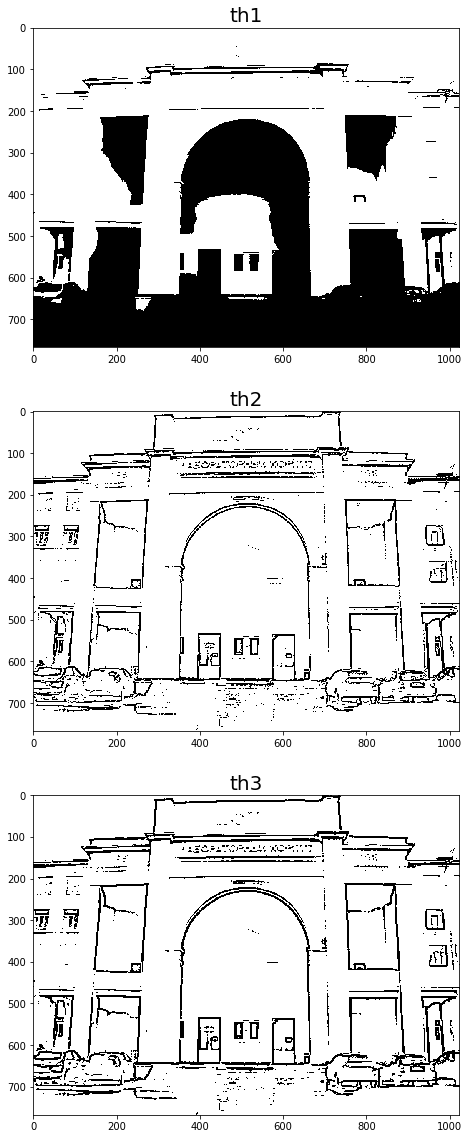

In [16]:
img = cv2.imread('img\\lk.jpg')
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.pyrMeanShiftFiltering(img, 25, 40)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

th1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)[1]
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)

## Визуализация
fig, m_axs = plt.subplots(3, 1, figsize=(24, 20))
ax1, ax2, ax3 = m_axs

plt.gray()
ax1.set_title('th1', fontsize=20)
ax1.imshow(th1)
ax2.set_title('th2', fontsize=20)
ax2.imshow(th2)
ax3.set_title('th3', fontsize=20)
ax3.imshow(th3);